<img align="right" width="250" height="150" src="https://lh3.googleusercontent.com/p/AF1QipPWZQfa087JiVjutpUTVEGRnh6W214Wjm439gKQ=w1080-h608-p-no-v0">

## **Proyecto:** Retención de usuarios de la Plataforma Digital

#### El objetivo de este notebook es realizar el análisis EDA del archivo de `..\Detalle_Trx_Monetarias_YYYYMM.csv` con el objeto de ver que datos incorporar en el archivo de `..\Crosseling_ampliado_YYYYMM.parquet`.

In [1]:
import pandas as pd
import pandas_profiling
import os

DIR = os.path.abspath(r'..\Data\Export') + '\\'

In [6]:
uc = [
    'TIPO_CANAL',
    'CANAL',
    'GRUPO_OPERACION',
    'TIPO_OPERACION',
    'TIPO_OPERACION2',
    'IMPORTE',
    'ORIGEN',
    'CANAL_RATIO',
    'CLASIF_TRX'
]

tc = dict(zip(uc, [str] * len(uc)))
tc.update({'IMPORTE': float})

In [7]:
file = DIR + 'Detalle_Trx_Monetarias_202204.csv'
df = pd.read_csv(file, index_col=False, usecols=uc, dtype=tc).sample(200_000) #Tomo una muestra sino pandas_profiling explota

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200000 entries, 5042936 to 11532419
Data columns (total 9 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   TIPO_CANAL       200000 non-null  object 
 1   CANAL            200000 non-null  object 
 2   GRUPO_OPERACION  200000 non-null  object 
 3   TIPO_OPERACION   200000 non-null  object 
 4   TIPO_OPERACION2  14401 non-null   object 
 5   IMPORTE          200000 non-null  float64
 6   ORIGEN           200000 non-null  object 
 7   CANAL_RATIO      200000 non-null  object 
 8   CLASIF_TRX       200000 non-null  object 
dtypes: float64(1), object(8)
memory usage: 15.3+ MB


In [9]:
# Analizamos
df.reset_index(drop=True, inplace=True)
report = pandas_profiling.ProfileReport(df)
report

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

#### Variables categóricas con menor grado de correlación *CANAL_RATIO* y *GRUPO_OPERACION*

In [10]:
# Remuevo los outliers del 1er y 3er quantil de Importe a ver que pasa
Q1 = df['IMPORTE'].quantile(0.25)
Q3 = df['IMPORTE'].quantile(0.75)
IQR = Q3 - Q1
print(Q1, Q3, IQR)

df = df[~((df['IMPORTE'] < (Q1 - 1.5 * IQR)) | (df['IMPORTE'] > (Q3 + 1.5 * IQR)))]
df.shape

1000.0 7051.34 6051.34


(179111, 9)

In [11]:
df.sample(20)

,TIPO_CANAL,CANAL,GRUPO_OPERACION,TIPO_OPERACION,TIPO_OPERACION2,IMPORTE,ORIGEN,CANAL_RATIO,CLASIF_TRX
108756,PRESENCIAL,TD (COMPRAS POSNET),TESORERIA,COMPRAS,NaN,827.00,LINK-E,RESTO,EXCLUIDAS
125004,INTERNET,BANCON_MOBILE,TESORERIA,TRANSFERENCIAS,NaN,820.00,OMNI,DIGITAL,TRANSFERENCIAS
44273,INTERNET,BANCON_WEB,TESORERIA,TRANSFERENCIAS,NaN,6000.00,OMNI,DIGITAL,TRANSFERENCIAS
85305,PRESENCIAL,TD (COMPRAS POSNET),TESORERIA,COMPRAS,NaN,3000.00,LINK-E,RESTO,EXCLUIDAS
117682,PRESENCIAL,TD (COMPRAS POSNET),TESORERIA,COMPRAS,NaN,744.00,LINK-E,RESTO,EXCLUIDAS
172099,PRESENCIAL,TD (COMPRAS POSNET),TESORERIA,COMPRAS,NaN,808.00,LINK-E,RESTO,EXCLUIDAS
81906,PROCESOS CENTRALIZAD,OP CENTRALIZADAS,TESORERIA,PAGOS,NaN,14070.24,CAMOVS,RESTO,EXCLUIDAS
114587,INTERNET,BANCON_WEB,TESORERIA,PAGOS,NaN,3000.00,OMNI,DIGITAL,EXCLUIDAS
191512,PRESENCIAL,TD (COMPRAS POSNET),TESORERIA,COMPRAS,NaN,1463.72,LINK-E,RESTO,EXCLUIDAS
141501,INTERNET,BANCON_MOBILE,TESORERIA,TRANSFERENCIAS,NaN,10000.00,OMNI,DIGITAL,TRANSFERENCIAS


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

KeyboardInterrupt: 

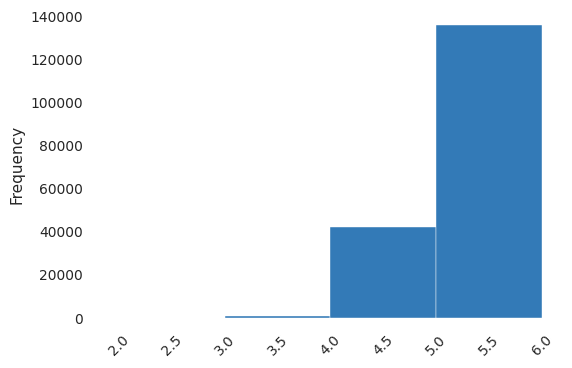

In [12]:
# Analizamos
df.reset_index(drop=True, inplace=True)
report = pandas_profiling.ProfileReport(df)
report

In [ ]:
# Averiguo la conbinaciones de valores del primer par de variables menos correlacionadas
df.groupby(['CANAL_RATIO', 'GRUPO_OPERACION']).size().reset_index(name='Freq')

,CANAL_RATIO,GRUPO_OPERACION,Freq
0,DIGITAL,ALTAS Y GEST COMERCIALES,82
1,DIGITAL,TESORERIA,57432
2,RESTO,ALTAS Y GEST COMERCIALES,77
3,RESTO,BACK OFFICE,37
4,RESTO,TESORERIA,121377


In [ ]:
# Averiguo la conbinaciones de valores del segundo par de variables menos correlacionadas
df.groupby(['CANAL_RATIO', 'GRUPO_OPERACION', 'TIPO_OPERACION']).size().reset_index(name='Freq')

,CANAL_RATIO,GRUPO_OPERACION,TIPO_OPERACION,Freq
0,DIGITAL,ALTAS Y GEST COMERCIALES,ALTAS,82
1,DIGITAL,TESORERIA,COMPRAS,12568
2,DIGITAL,TESORERIA,DEPOSITOS,3
3,DIGITAL,TESORERIA,OTR MONET,806
4,DIGITAL,TESORERIA,PAGOS,5993
5,DIGITAL,TESORERIA,RECAUDACIONES,8287
6,DIGITAL,TESORERIA,TRANSFERENCIAS,29775
7,RESTO,ALTAS Y GEST COMERCIALES,ALTAS,77
8,RESTO,BACK OFFICE,MONET BO,37
9,RESTO,TESORERIA,COMPRAS,46679


In [ ]:
# Averiguo como un cliente puede depositar por canal digital
df[((df['CANAL_RATIO']=='DIGITAL') & (df['TIPO_OPERACION']=='DEPOSITOS'))]

,TIPO_CANAL,CANAL,GRUPO_OPERACION,TIPO_OPERACION,TIPO_OPERACION2,IMPORTE,ORIGEN,CANAL_RATIO,CLASIF_TRX
119638,INTERNET,BANCON_MOBILE,TESORERIA,DEPOSITOS,ECHEQUE,12000.00,OMNI,DIGITAL,DEPOSITOS
132079,INTERNET,BANCON_MOBILE,TESORERIA,DEPOSITOS,ECHEQUE,4649.96,OMNI,DIGITAL,DEPOSITOS
163312,INTERNET,BANCON_WEB,TESORERIA,DEPOSITOS,ECHEQUE,9600.00,OMNI,DIGITAL,DEPOSITOS


In [ ]:
# Averiguo como un cliente puede depositar por canal digital
df[((df['CANAL_RATIO']=='RESTO') & (df['TIPO_OPERACION']=='MONET BO'))]

,TIPO_CANAL,CANAL,GRUPO_OPERACION,TIPO_OPERACION,TIPO_OPERACION2,IMPORTE,ORIGEN,CANAL_RATIO,CLASIF_TRX
401,PRESENCIAL,SUCURSAL,BACK OFFICE,MONET BO,OTR MONET,8152.00,CCMOVS,RESTO,EXCLUIDAS
7176,PRESENCIAL,SUCURSAL,BACK OFFICE,MONET BO,OTR MONET,14300.00,CCMOVS,RESTO,EXCLUIDAS
9989,NO PRESENCIAL,SUCURSAL,BACK OFFICE,MONET BO,OTR MONET,440.00,PDC,RESTO,EXCLUIDAS
14831,NO PRESENCIAL,SUCURSAL,BACK OFFICE,MONET BO,OTR MONET,1820.00,PDC,RESTO,EXCLUIDAS
18461,NO PRESENCIAL,SUCURSAL,BACK OFFICE,MONET BO,OTR MONET,10452.50,PDC,RESTO,EXCLUIDAS
19484,NO PRESENCIAL,SUCURSAL,BACK OFFICE,MONET BO,OTR MONET,8391.60,PDC,RESTO,EXCLUIDAS
23274,NO PRESENCIAL,SUCURSAL,BACK OFFICE,MONET BO,OTR MONET,105.45,PDC,RESTO,EXCLUIDAS
26473,NO PRESENCIAL,SUCURSAL,BACK OFFICE,MONET BO,OTR MONET,7158.69,PDC,RESTO,EXCLUIDAS
31287,NO PRESENCIAL,SUCURSAL,BACK OFFICE,MONET BO,OTR MONET,0.14,PDC,RESTO,EXCLUIDAS
32480,NO PRESENCIAL,SUCURSAL,BACK OFFICE,MONET BO,OTR MONET,3000.00,PDC,RESTO,EXCLUIDAS
